In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [332]:
#Reading the dataset
df_bike=pd.read_csv('day.csv')

In [333]:
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [334]:
df_bike.shape

(730, 16)

In [335]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [336]:
#looking at the numerical values of the dataset
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [337]:
#check the datatypes of data
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [338]:
#checking if there are any null values
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

####  There are no null values present in the dataset

### Converting the appropriate columns to appropriate type and assigning meaningful values for better unerstanding of dataset

In [339]:
#Assigning string values to different season instead of numeric values.

#replacing 1 with spring
df_bike['season']=df_bike['season'].replace(1,'spring')

#replacing 2 with summer
df_bike['season']=df_bike['season'].replace(2,'summer')

#replacing 3 with fall
df_bike['season']=df_bike['season'].replace(3,'fall')

#replacing 4 with winter
df_bike['season']=df_bike['season'].replace(4,'winter')




In [340]:
#checking the different value counts
df_bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [341]:
#changing type to category
df_bike['season'].astype('category')

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [342]:
#mapping the month name to corresponding numbers

def year(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df_bike[['mnth']]= df_bike[['mnth']].apply(year)


In [343]:
df_bike['mnth'].value_counts()

Dec    62
Jul    62
Jan    62
Mar    62
Aug    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [344]:
#changing type to category
df_bike['mnth'].astype('category')

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: category
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']

In [345]:
#mapping the weekday to corresponding day number

def week_day(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})

df_bike[['weekday']] =df_bike[['weekday']].apply(week_day)

In [346]:
df_bike.weekday.value_counts()

Mon    105
Tue    105
Sun    104
Thu    104
Sat    104
Fri    104
Wed    104
Name: weekday, dtype: int64

In [347]:
#changing type to category
df_bike.weekday.astype('category')

0      Mon
1      Tue
2      Wed
3      Thu
4      Fri
      ... 
725    Fri
726    Sat
727    Sun
728    Mon
729    Tue
Name: weekday, Length: 730, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [348]:
#Assigning string values to different weather conditions instead of numeric values.

#replacing 1 with spring
df_bike['weathersit']=df_bike['weathersit'].replace(1,'good')

#replacing 2 with summer
df_bike['weathersit']=df_bike['weathersit'].replace(2,'moderate')

#replacing 3 with fall
df_bike['weathersit']=df_bike['weathersit'].replace(3,'bad')

#replacing 4 with winter
df_bike['weathersit']=df_bike['weathersit'].replace(4,'extremely bad')



In [349]:
df_bike['weathersit'].value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [350]:
#changing type to category 
df_bike['weathersit'].astype('category')

0      moderate
1      moderate
2          good
3          good
4          good
         ...   
725    moderate
726    moderate
727    moderate
728        good
729    moderate
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['bad', 'good', 'moderate']

In [351]:
#converting dteday to datetime

df_bike['dteday'] = df_bike['dteday'].astype('datetime64')


In [352]:
#checking the datatypes
df_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [353]:
#checking dataset again
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,spring,0,Jan,0,Sat,0,good,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,spring,0,Jan,0,Sun,0,moderate,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-08-01,spring,0,Jan,0,Mon,1,moderate,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-09-01,spring,0,Jan,0,Tue,1,good,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-10-01,spring,0,Jan,0,Wed,1,good,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### Dropping few columns

In [354]:
#dropping 'instant' col since it is just a serial no.
# for backup df_bike0=df_bike.copy()

In [355]:
df_bike=df_bike.drop('instant',axis=1)

In [356]:
df_bike.shape

(730, 15)

In [357]:
#dropping 'casual' and 'registered' columns because 'cnt' is showing the total value
df_bike=df_bike.drop(['casual','registered'],axis=1)

In [358]:
df_bike.shape

(730, 13)

In [359]:
#dropping date column as well since we have other columns describing the months and other features of date
df_bike=df_bike.drop('dteday',axis=1)

In [360]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the Dataset

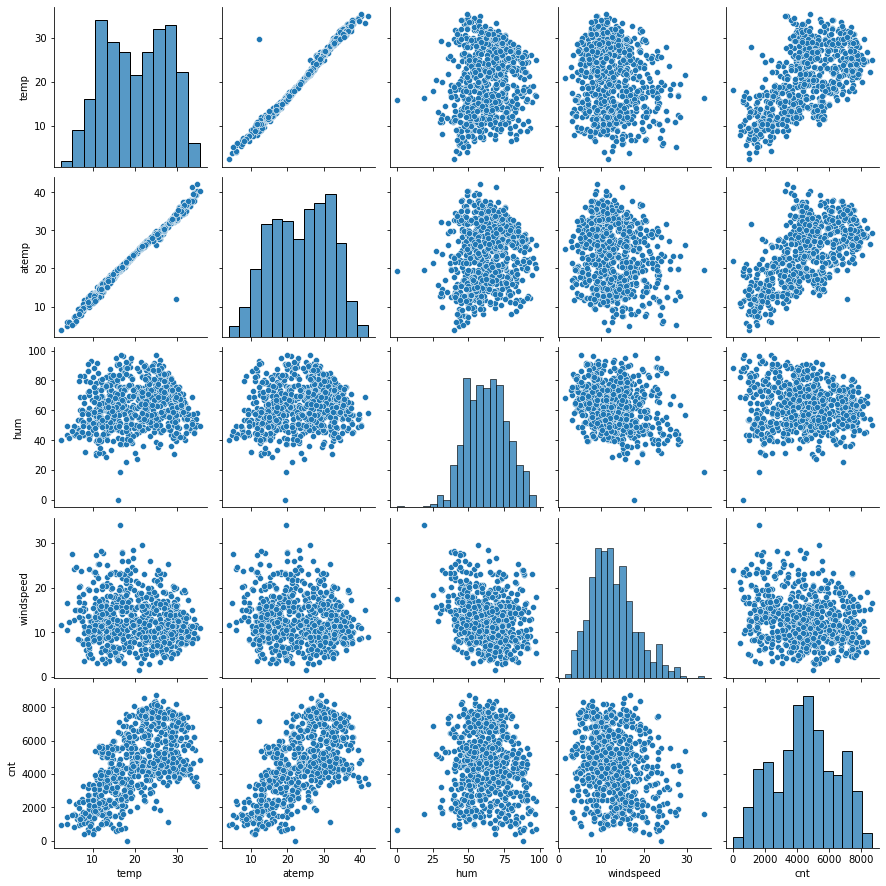

In [361]:
#visualizing numerical variables

num_var=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(data=df_bike[num_var])
plt.show()

#### Inferences 
    The above Pair-Plots shows us that there is a linear relation  between 'temp','atemp' and 'cnt' variable

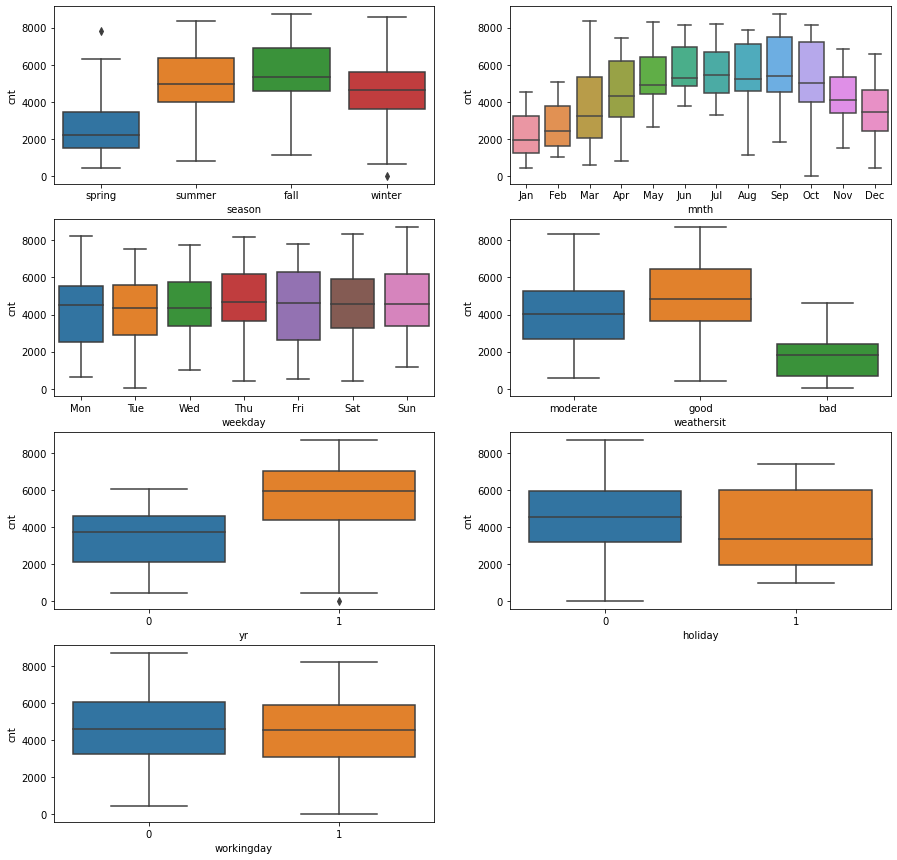

In [362]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)





plt.show()

#### Inferences : We can conclude from the above Box-plots :
    1. We can see demand rising from Spring then Summer and being highest in Fall for rental bikes.
    2. Demand is continuously from May to September and September has highest demand.Demand is decreasing after September.
    3. Demand is similar across all the weekdays.
    4. Good weather has highest requirement followed by moderate.
    5. Demand has increased for next year.
    6. There is more demand on working days(non holiday).
    

### Creating Dummy Variables 

There are 4 categorical variables which we need to convert:`season`,`weekday`,`weathersit` , `mnth`

In [363]:
categ_var=['season','weekday','weathersit','mnth']

In [364]:
dummies=pd.get_dummies(df_bike[categ_var],drop_first=True)

In [365]:
#taking a look at head of dummies dataset
dummies.head()

,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_good,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [366]:
#checking the shape of the dummies dataset
dummies.shape

(730, 22)

In [367]:
# Adding the results to the original housing dataframe

df_bike_new = pd.concat([df_bike, dummies], axis = 1)

In [368]:
df_bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,spring,0,Jan,0,Mon,1,moderate,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,moderate,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,good,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thu,1,good,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,good,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [369]:
#we see there are 34 columns in total and earlier we had 12 columns
#now we need to drop the original categorical columns

In [370]:
df_bike_new=df_bike_new.drop(df_bike_new[categ_var],axis=1)

In [371]:
#head of new dataset
df_bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [372]:
#info of new dataset
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  weekday_Mon          730 non-null    uint8  
 12  weekday_Sat          730 non-null    uint8  
 13  weekday_Sun          730 non-null    uint8  
 14  weekday_Thu          730 non-null    uint8  
 15  weekday_Tue          730 non-null    uin

## Test Train Split

#### Splitting the dataset into 70:30 ratio

In [373]:
#Splitting the data
bike_train, bike_test = train_test_split(df_bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [374]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [375]:
bike_train.shape

(510, 30)

## Scaling the variables using MinMaxScaler
     

#### Now few variables are already in 0-1 form. Hence, we need to scale only the rest of the variables

In [376]:
scaler=MinMaxScaler()

In [377]:
num_var=['temp','atemp','hum','windspeed','cnt']

In [378]:
bike_train[num_var]=scaler.fit_transform(bike_train[num_var])

In [379]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [380]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
#it is visible that max and min in each col is 1 & 0 respectively.


##### Plotting a Heatmap to check correlations between the variables

<AxesSubplot:>

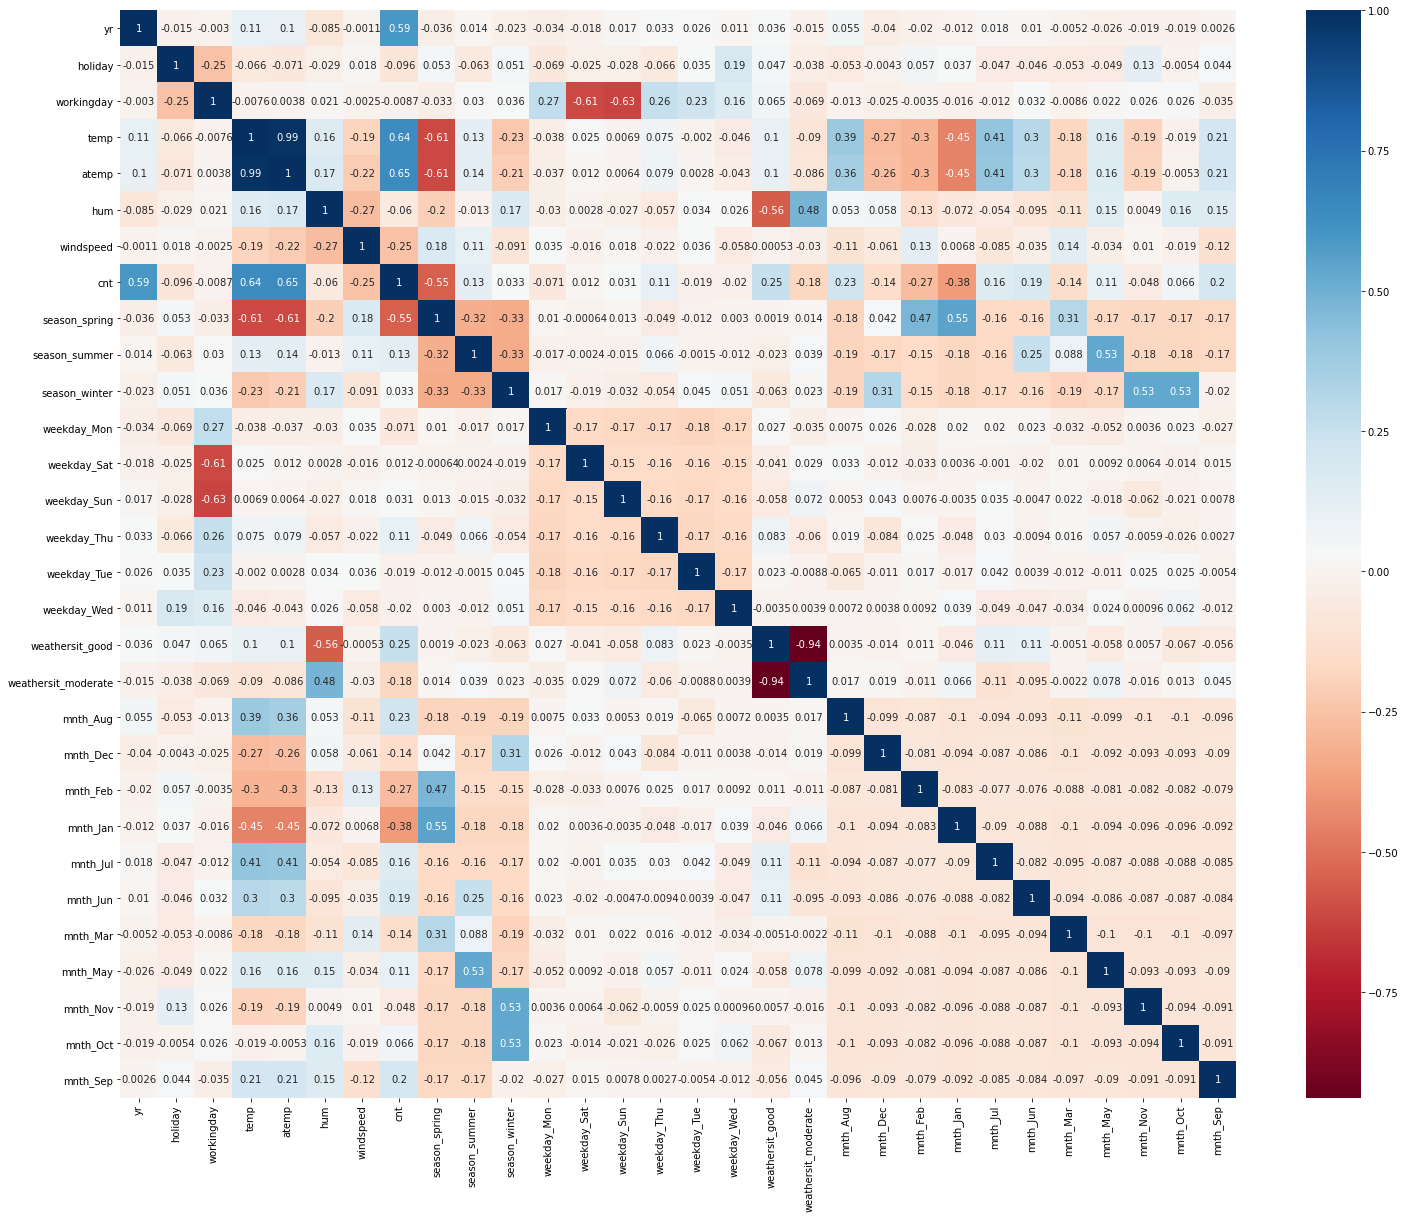

In [382]:
plt.figure(figsize=[25,20])
sns.heatmap(bike_train.corr(),annot=True,cmap='RdBu')

It can be noticed that there is some good correlations between `cnt` and `year`,`temp`,`atemp`,`season-spring`

### Dividing into X and Y sets for the model building

In [383]:
y_train = bike_train.pop('cnt')
X_train = bike_train

##### Looking at shape just to confirm

In [384]:
X_train.shape

(510, 29)

In [385]:
y_train.shape

(510,)

## Building the model using sklearn 
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [386]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [387]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1)]

In [388]:
#taking a look at which all 16 columns are selected by RFE
columns=X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_moderate', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [389]:
#creating a new df with RFE supported variables
X_train_rfe=X_train[columns]

In [390]:
#checking shape
X_train_rfe.shape

(510, 16)

## Building the model using statsmodels


Building model using `statsmodels` to understand the model which we create using RFE variables

In [391]:
#adding constant to X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)

In [392]:
#creating the model
lr_sm=sm.OLS(y_train,X_train_sm).fit()


In [393]:
#looking at summary of the model
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.15e-188
Time:                        02:07:32   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0825      0.048      1.725      0.085      -0.011       0.176
yr                      0.2307      0.008     28.597      0.000       0.215       0.247
holiday                -0.0887      0.026     -3.469      0.001      -0.139      -0.038
temp                    0.4639      0.038     12.156      0.000       0.389       0.539
hum                    -0.1581      0.038     -4.189      0.000      -0.232      -0.084
windspeed              -0.1897      0.026     -7.369      0.000      -0.240      -0.139
season_spring          -0.0518      0.022     -2.353      0.019      -0.095      -0.009
season_summer           0.0374      0.015      2.425      0.016       0.007       0.068
season_winter           0.1016      0.018      5.662      0.000       0.066       0.137
weathersit_good         0.2495      0.026      9.468      0.000       0.198       0.301
weathersit_moderate     0.1934      0.025      7.754      0.000       0.144       0.242
mnth_Dec               -0.0465      0.018     -2.541      0.011      -0.082      -0.011
mnth_Feb               -0.0361      0.022     -1.667      0.096      -0.079       0.006
mnth_Jan               -0.0631      0.021     -2.936      0.003      -0.105      -0.021
mnth_Jul               -0.0545      0.018     -2.995      0.003      -0.090      -0.019
mnth_Nov               -0.0458      0.019     -2.421      0.016      -0.083      -0.009
mnth_Sep                0.0734      0.017      4.349      0.000       0.040       0.107
==============================================================================
Omnibus:                       71.849   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.456
Skew:                          -0.726   Prob(JB):                     4.82e-39
Kurtosis:                       5.489   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for the predictor vars

In [394]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.84
2,temp,26.41
8,weathersit_good,16.07
9,weathersit_moderate,9.38
5,season_spring,6.52
4,windspeed,4.67
7,season_winter,4.54
6,season_summer,3.31
12,mnth_Jan,2.51
0,yr,2.10


In [395]:
#Clearly visible that VIF for 'hum','temp,'weathersit_good' is extremely high.

In [396]:
#Removing 'hum' from the dataset as it is having highest VIF and rebuilding the model

In [397]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

### Model 2 
After removing `hum` 

In [398]:
#adding constant to X_train_rfe
X_train_sm2=sm.add_constant(X_train_rfe)

In [399]:
#creating the model
lr_sm2=sm.OLS(y_train,X_train_sm2).fit()


In [400]:
#looking at summary of the model
lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.55e-186
Time:                        02:07:39   Log-Likelihood:                 507.23
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     494   BIC:                            -914.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0333      0.040     -0.841      0.401      -0.111       0.045
yr                      0.2346      0.008     28.805      0.000       0.219       0.251
holiday                -0.0892      0.026     -3.431      0.001      -0.140      -0.038
temp                    0.4208      0.037     11.263      0.000       0.347       0.494
windspeed              -0.1603      0.025     -6.368      0.000      -0.210      -0.111
season_spring          -0.0607      0.022     -2.726      0.007      -0.105      -0.017
season_summer           0.0298      0.016      1.910      0.057      -0.001       0.060
season_winter           0.0869      0.018      4.857      0.000       0.052       0.122
weathersit_good         0.2938      0.025     11.968      0.000       0.246       0.342
weathersit_moderate     0.2124      0.025      8.520      0.000       0.163       0.261
mnth_Dec               -0.0545      0.018     -2.946      0.003      -0.091      -0.018
mnth_Feb               -0.0391      0.022     -1.779      0.076      -0.082       0.004
mnth_Jan               -0.0711      0.022     -3.270      0.001      -0.114      -0.028
mnth_Jul               -0.0494      0.018     -2.675      0.008      -0.086      -0.013
mnth_Nov               -0.0471      0.019     -2.449      0.015      -0.085      -0.009
mnth_Sep                0.0667      0.017      3.905      0.000       0.033       0.100
==============================================================================
Omnibus:                       74.865   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.592
Skew:                          -0.745   Prob(JB):                     6.77e-42
Kurtosis:                       5.589   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check -2

In [401]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,weathersit_good,16.05
2,temp,14.46
8,weathersit_moderate,8.98
4,season_spring,5.46
3,windspeed,4.66
6,season_winter,3.37
5,season_summer,2.77
11,mnth_Jan,2.37
0,yr,2.08
10,mnth_Feb,1.92


In [402]:
#Removing 'weathersit_good' from the dataset as it is having highest VIF and rebuilding the model

### Model 3
After removing `weathersit_good` 

In [403]:
#dropping weathersit_good 
X_train_rfe=X_train_rfe.drop('weathersit_good',axis=1)

In [404]:
#adding constant to X_train_rfe
X_train_sm3=sm.add_constant(X_train_rfe)

#creating the model
lr_sm3=sm.OLS(y_train,X_train_sm3).fit()


In [405]:
#looking at summary of the model
lr_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.42e-160
Time:                        02:07:42   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -854.6
Df Residuals:                     495   BIC:                            -791.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2316      0.037      6.207      0.000       0.158       0.305
yr                      0.2401      0.009     26.022      0.000       0.222       0.258
holiday                -0.0782      0.029     -2.652      0.008      -0.136      -0.020
temp                    0.4519      0.042     10.687      0.000       0.369       0.535
windspeed              -0.1878      0.028     -6.601      0.000      -0.244      -0.132
season_spring          -0.0515      0.025     -2.037      0.042      -0.101      -0.002
season_summer           0.0372      0.018      2.107      0.036       0.003       0.072
season_winter           0.0733      0.020      3.617      0.000       0.033       0.113
weathersit_moderate    -0.0676      0.010     -6.924      0.000      -0.087      -0.048
mnth_Dec               -0.0361      0.021     -1.728      0.085      -0.077       0.005
mnth_Feb               -0.0337      0.025     -1.351      0.177      -0.083       0.015
mnth_Jan               -0.0586      0.025     -2.377      0.018      -0.107      -0.010
mnth_Jul               -0.0525      0.021     -2.509      0.012      -0.094      -0.011
mnth_Nov               -0.0293      0.022     -1.347      0.178      -0.072       0.013
mnth_Sep                0.0603      0.019      3.117      0.002       0.022       0.098
==============================================================================
Omnibus:                      151.479   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.715
Skew:                          -1.297   Prob(JB):                    3.60e-131
Kurtosis:                       7.641   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check -3

In [406]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,4.61
4,season_spring,4.33
6,season_winter,2.92
5,season_summer,2.23
10,mnth_Jan,2.21
0,yr,2.07
9,mnth_Feb,1.88
12,mnth_Nov,1.81
11,mnth_Jul,1.60


In [407]:
#it can be observed that VIFs have dropped by good margin 

`mnth_Feb` and `mnth_Nov` have `p-value` above acceptance value
dropping `mnth_Feb` since it has higher `VIF`

### Model 4
After removing `mnth_Feb` 

In [408]:
#dropping mnth_Feb 
X_train_rfe=X_train_rfe.drop('mnth_Feb',axis=1)

In [409]:
#adding constant to X_train_rfe
X_train_sm4=sm.add_constant(X_train_rfe)

#creating the model
lr_sm4=sm.OLS(y_train,X_train_sm4).fit()


In [410]:
#looking at summary of the model
lr_sm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.08e-160
Time:                        02:07:44   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2198      0.036      6.054      0.000       0.148       0.291
yr                      0.2398      0.009     25.974      0.000       0.222       0.258
holiday                -0.0806      0.029     -2.734      0.006      -0.138      -0.023
temp                    0.4664      0.041     11.389      0.000       0.386       0.547
windspeed              -0.1862      0.028     -6.546      0.000      -0.242      -0.130
season_spring          -0.0609      0.024     -2.505      0.013      -0.109      -0.013
season_summer           0.0402      0.018      2.294      0.022       0.006       0.075
season_winter           0.0748      0.020      3.696      0.000       0.035       0.115
weathersit_moderate    -0.0677      0.010     -6.926      0.000      -0.087      -0.048
mnth_Dec               -0.0276      0.020     -1.383      0.167      -0.067       0.012
mnth_Jan               -0.0406      0.021     -1.956      0.051      -0.081       0.000
mnth_Jul               -0.0534      0.021     -2.549      0.011      -0.095      -0.012
mnth_Nov               -0.0248      0.022     -1.154      0.249      -0.067       0.017
mnth_Sep                0.0617      0.019      3.189      0.002       0.024       0.100
==============================================================================
Omnibus:                      146.814   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.237
Skew:                          -1.261   Prob(JB):                    9.07e-125
Kurtosis:                       7.530   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check - 4

In [411]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.60
4,season_spring,2.89
6,season_winter,2.88
5,season_summer,2.23
0,yr,2.07
11,mnth_Nov,1.79
9,mnth_Jan,1.66
10,mnth_Jul,1.59
7,weathersit_moderate,1.54


`mnth_Nov` have `p-value` above acceptance value increased after previous model
Hence dropping it.

### Model 5
-removing `mnth_Nov`

In [412]:
#dropping mnth_Feb 
X_train_rfe=X_train_rfe.drop('mnth_Nov',axis=1)

In [413]:
#adding constant to X_train_rfe
X_train_sm5=sm.add_constant(X_train_rfe)

#creating the model
lr_sm5=sm.OLS(y_train,X_train_sm5).fit()


In [414]:
#looking at summary of the model
lr_sm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.63e-161
Time:                        02:07:49   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2094      0.035      5.952      0.000       0.140       0.279
yr                      0.2397      0.009     25.954      0.000       0.222       0.258
holiday                -0.0847      0.029     -2.898      0.004      -0.142      -0.027
temp                    0.4784      0.040     12.078      0.000       0.401       0.556
windspeed              -0.1865      0.028     -6.555      0.000      -0.242      -0.131
season_spring          -0.0558      0.024     -2.335      0.020      -0.103      -0.009
season_summer           0.0436      0.017      2.523      0.012       0.010       0.078
season_winter           0.0691      0.020      3.519      0.000       0.031       0.108
weathersit_moderate    -0.0674      0.010     -6.893      0.000      -0.087      -0.048
mnth_Dec               -0.0186      0.018     -1.013      0.312      -0.055       0.017
mnth_Jan               -0.0376      0.021     -1.825      0.069      -0.078       0.003
mnth_Jul               -0.0533      0.021     -2.543      0.011      -0.094      -0.012
mnth_Sep                0.0652      0.019      3.409      0.001       0.028       0.103
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check - 5

In [415]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.56
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
6,season_winter,2.02
9,mnth_Jan,1.65
10,mnth_Jul,1.59
7,weathersit_moderate,1.54
11,mnth_Sep,1.34


`mnth_Dec` have `p-value` above acceptance value.
Hence dropping it.

### Model 6
-removing `mnth_Dec`

In [416]:
#dropping mnth_Dec 
X_train_rfe=X_train_rfe.drop('mnth_Dec',axis=1)

In [417]:
#adding constant to X_train_rfe
X_train_sm6=sm.add_constant(X_train_rfe)

#creating the model
lr_sm6=sm.OLS(y_train,X_train_sm6).fit()


In [418]:
#looking at summary of the model
lr_sm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.01e-162
Time:                        02:07:52   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2010      0.034      5.879      0.000       0.134       0.268
yr                      0.2397      0.009     25.953      0.000       0.222       0.258
holiday                -0.0839      0.029     -2.869      0.004      -0.141      -0.026
temp                    0.4876      0.039     12.644      0.000       0.412       0.563
windspeed              -0.1835      0.028     -6.484      0.000      -0.239      -0.128
season_spring          -0.0549      0.024     -2.297      0.022      -0.102      -0.008
season_summer           0.0456      0.017      2.654      0.008       0.012       0.079
season_winter           0.0680      0.020      3.469      0.001       0.029       0.107
weathersit_moderate    -0.0674      0.010     -6.899      0.000      -0.087      -0.048
mnth_Jan               -0.0331      0.020     -1.645      0.101      -0.073       0.006
mnth_Jul               -0.0536      0.021     -2.557      0.011      -0.095      -0.012
mnth_Sep                0.0667      0.019      3.498      0.001       0.029       0.104
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check - 6

In [419]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.55
4,season_spring,2.75
5,season_summer,2.22
0,yr,2.07
6,season_winter,1.76
8,mnth_Jan,1.61
9,mnth_Jul,1.59
7,weathersit_moderate,1.53
10,mnth_Sep,1.33


`mnth_Jan` have `p-value` above acceptance value.
Hence dropping it.

### Model 7
-removing `mnth_Jan`

In [420]:
#dropping mnth_Jan 
X_train_rfe=X_train_rfe.drop('mnth_Jan',axis=1)

In [421]:
#adding constant to X_train_rfe
X_train_sm7=sm.add_constant(X_train_rfe)

#creating the model
lr_sm7=sm.OLS(y_train,X_train_sm7).fit()


In [422]:
#looking at summary of the model
lr_sm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.44e-163
Time:                        02:07:59   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1872      0.033      5.638      0.000       0.122       0.252
yr                      0.2390      0.009     25.862      0.000       0.221       0.257
holiday                -0.0845      0.029     -2.887      0.004      -0.142      -0.027
temp                    0.5039      0.037     13.497      0.000       0.431       0.577
windspeed              -0.1773      0.028     -6.311      0.000      -0.232      -0.122
season_spring          -0.0597      0.024     -2.511      0.012      -0.106      -0.013
season_summer           0.0483      0.017      2.817      0.005       0.015       0.082
season_winter           0.0733      0.019      3.785      0.000       0.035       0.111
weathersit_moderate    -0.0682      0.010     -6.980      0.000      -0.087      -0.049
mnth_Jul               -0.0550      0.021     -2.625      0.009      -0.096      -0.014
mnth_Sep                0.0671      0.019      3.515      0.000       0.030       0.105
==============================================================================
Omnibus:                      137.062   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.223
Skew:                          -1.196   Prob(JB):                    1.07e-108
Kurtosis:                       7.204   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check - 7

In [423]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.21
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.76
8,mnth_Jul,1.58
7,weathersit_moderate,1.52
9,mnth_Sep,1.33
1,holiday,1.04


In [424]:
#removing 'temp' as it is having high VIF value

### Model 8
-removing `temp`

In [425]:
#dropping mnth_Jan 
X_train_rfe=X_train_rfe.drop('temp',axis=1)

In [426]:
#adding constant to X_train_rfe
X_train_sm8=sm.add_constant(X_train_rfe)

#creating the model
lr_sm8=sm.OLS(y_train,X_train_sm8).fit()

In [427]:
#looking at summary of the model
lr_sm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.57e-130
Time:                        02:08:07   Log-Likelihood:                 359.42
No. Observations:                 510   AIC:                            -698.8
Df Residuals:                     500   BIC:                            -656.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5815      0.018     31.571      0.000       0.545       0.618
yr                      0.2533      0.011     23.637      0.000       0.232       0.274
holiday                -0.0871      0.034     -2.549      0.011      -0.154      -0.020
windspeed              -0.2018      0.033     -6.166      0.000      -0.266      -0.137
season_spring          -0.2991      0.018    -16.202      0.000      -0.335      -0.263
season_summer          -0.0456      0.018     -2.491      0.013      -0.081      -0.010
season_winter          -0.0924      0.017     -5.287      0.000      -0.127      -0.058
weathersit_moderate    -0.0773      0.011     -6.792      0.000      -0.100      -0.055
mnth_Jul               -0.0147      0.024     -0.608      0.543      -0.062       0.033
mnth_Sep                0.0624      0.022      2.802      0.005       0.019       0.106
==============================================================================
Omnibus:                       74.866   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.393
Skew:                          -0.732   Prob(JB):                     1.37e-43
Kurtosis:                       5.674   Cond. No.                         9.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check - 8

In [428]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.75
3,season_spring,2.07
4,season_summer,2.00
0,yr,1.83
5,season_winter,1.71
6,weathersit_moderate,1.48
7,mnth_Jul,1.19
8,mnth_Sep,1.15
1,holiday,1.04


### Model 9
-removing `mnth_Jul`

In [429]:
#dropping mnth_Jul 
X_train_rfe=X_train_rfe.drop('mnth_Jul',axis=1)

In [430]:
#adding constant to X_train_rfe
X_train_sm9=sm.add_constant(X_train_rfe)

#creating the model
lr_sm9=sm.OLS(y_train,X_train_sm9).fit()

In [431]:
#looking at summary of the model
lr_sm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.46e-131
Time:                        02:08:15   Log-Likelihood:                 359.24
No. Observations:                 510   AIC:                            -700.5
Df Residuals:                     501   BIC:                            -662.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5760      0.016     35.876      0.000       0.544       0.608
yr                      0.2534      0.011     23.659      0.000       0.232       0.274
holiday                -0.0868      0.034     -2.541      0.011      -0.154      -0.020
windspeed              -0.2017      0.033     -6.167      0.000      -0.266      -0.137
season_spring          -0.2938      0.016    -17.991      0.000      -0.326      -0.262
season_summer          -0.0403      0.016     -2.500      0.013      -0.072      -0.009
season_winter          -0.0875      0.015     -5.653      0.000      -0.118      -0.057
weathersit_moderate    -0.0768      0.011     -6.770      0.000      -0.099      -0.055
mnth_Sep                0.0665      0.021      3.136      0.002       0.025       0.108
==============================================================================
Omnibus:                       74.889   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.099
Skew:                          -0.734   Prob(JB):                     2.62e-43
Kurtosis:                       5.659   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [432]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.39
3,season_spring,1.91
4,season_summer,1.85
0,yr,1.77
5,season_winter,1.61
6,weathersit_moderate,1.48
7,mnth_Sep,1.14
1,holiday,1.04


Now, quite visible that both `p-value` and `VIF` values within acceptance range.
Therefore we can go ahead and make predictions.

## Residual Analysis of Train Data

In [433]:
y_train_pred = lr_sm9.predict(X_train_sm9)

Text(0.5, 0, 'Residuals')

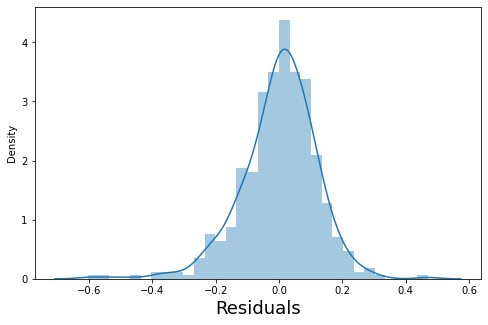

In [434]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=[8,5])
sns.distplot(y_train - y_train_pred)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18) 

We can conclude from above histogram that the residuals are normally distributed

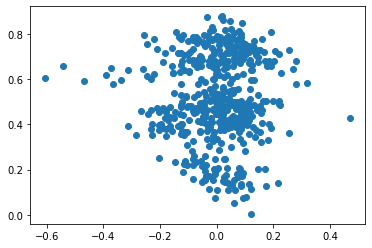

In [461]:
plt.scatter(y_train - y_train_pred,y_train_pred)
plt.show()

## Making Predictions using Final model (lr_sm9)

#### Scaling the Test dataset

In [435]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


In [436]:
num_col=['temp','atemp','hum','windspeed','cnt']

In [437]:
bike_test[num_col]=scaler.transform(bike_test[num_col])

In [438]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [439]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [440]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [443]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
model_columns=X_train_sm9.columns
X_test_sm=X_test_sm[model_columns] 

In [444]:
# Making predictions using the lr_sm9 model

y_test_pred = lr_sm9.predict(X_test_sm)

##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

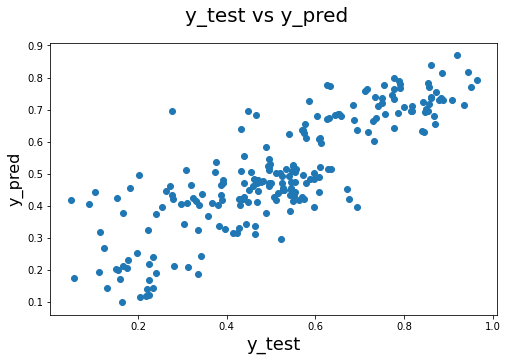

In [446]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=[8,5])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

 count = 0.5760 + 0.2534  *  yr - 0.086  *  holiday - 0.201 * windspeed - 0.093 * season_spring - 0.04 * season_summer - 0.0875 * season_winter - 0.0768 * weathersit_moderate + 0.0665 * mnth_Sep 


## R^2 Value for Test dataset

In [457]:
#checking r-square value for test data
r2_score(y_test, y_test_pred)

0.7025247709137805

#### -Train data R-square=0.716
#### -Test data  R-square=0.702